# Применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации

**Описание задания:**
Нужно решить задачу классификации физических лиц по уровню дохода.
Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная.

**Описание данных:**
age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

class: >50K, <=50K


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/adult.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Удаление пропусков в данных:

In [ ]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [ ]:
data = data.replace('?', np.nan)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


Визуализация данных:

In [ ]:
rich = data[(data['income']=='>50K')]
poor = data[(data['income']=='<=50K')]
rich_age = rich['age']
poor_age = poor['age']

Text(0.5, 0, 'Возраст физических лиц')

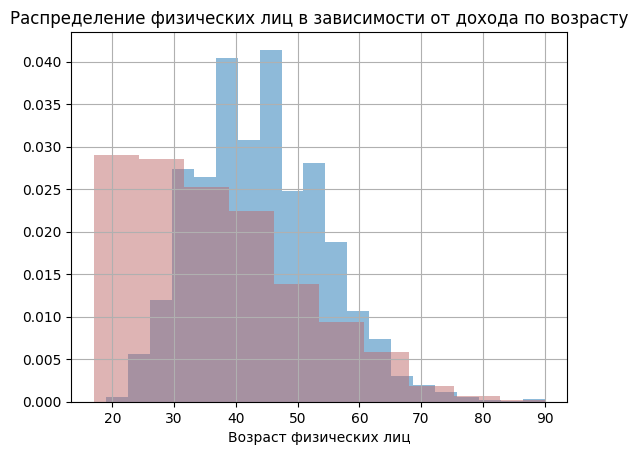

In [ ]:
import seaborn as sns
rich_age.hist(density = 1, histtype = 'stepfilled', alpha = .5, bins = 20)
poor_age.hist(density = 1, histtype = 'stepfilled', alpha = .5,
color = sns.desaturate("indianred", .75), bins = 10)
plt.title("Распределение физических лиц в зависимости от дохода по возрасту")
plt.xlabel("Возраст физических лиц")

Категория дохода меньше 50К представлена красным графиком, больше 50К - синим. Возвраст влияет на доход - большинство богатых людей находится на отрезке от 35 до 50 лет, количество людей с доходом меньше 50К уменьшается с увеличением возраста.

In [ ]:
list_of_values = ['Bachelors', 'Masters', 'Doctorate', 'HS-grad', 'Some-college', '11th', 'Assoc-voc']
a = rich[rich['education'].isin(list_of_values)]
b = poor[poor['education'].isin(list_of_values)]

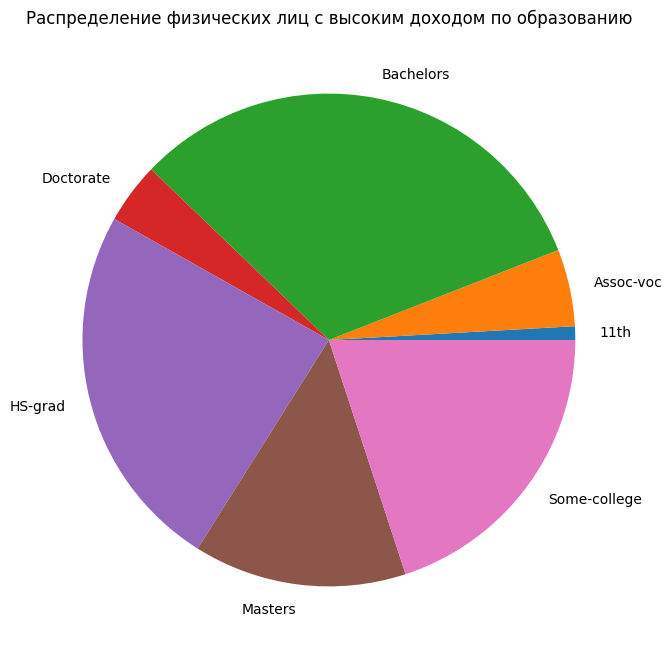

In [ ]:
df = a.groupby('education').size()
df.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Распределение физических лиц с высоким доходом по образованию")
plt.ylabel("")
plt.show()

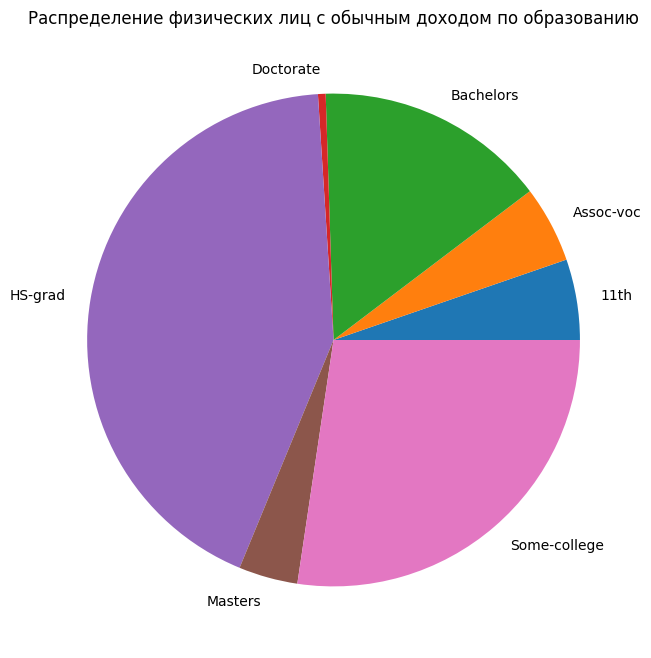

In [ ]:
df = b.groupby('education').size()
df.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Распределение физических лиц с обычным доходом по образованию")
plt.ylabel("")
plt.show()

Из графиков можно сделать вывод, что люди с более высоким доходом чаще имеют степень бакалавра, а также магистра и доктора наук. Люди с доходом менее 50К чаще оканчивают высшую школу (самая высокая доля), колледж и бакалавриат, не переходя на ступени выше. Образование в целом влияет на уровень дохода.

**Машинное** **обучение**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
selectedColumns = data[['age', 'education', 'income']]

Преобразуем категоральные признаки в числа

In [ ]:
X =pd.get_dummies(selectedColumns, columns=['education'])
del X['income']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(data['income'])

LabelEncoder()

In [ ]:
y = pd.Series(data=le.transform(data['income']))

Стандартизируем данные

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

**Обучение**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.score(X_train, y_train)

0.7766260331149626

In [ ]:
model.score(X_test, y_test)

0.7827529021558872

На тестовой выборке модель после обучения показала себя лучше. Правильные ответы составляют 78%.

**Метод опорных векторов**

In [ ]:
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
clf.score(X_train, y_train)

0.7850291621748625

In [ ]:
clf.score(X_test, y_test)

0.7925925925925926

Модель обучалась минуту. Тем не менее, качество оказалось лучше.

**Выводы**

Нам поступили данные о физических лицах. Необходимо было обучить модель предсказывать доход лиц - до 50К и выше 50К. Для этого мы выбрали признаки "возраст" и "образование". Для обучения были использованы логистическая регрессия и метод опорных векторов. Несмотря на то, что метод опорных векторов показал качество модели лучше, чем логистическая регрессия, различия минимальны, но скорость метода опорных векторов, если данных станет больше, не позволит модели быстро обучаться. Мы считаем, что возможно, для улучшения результатов, можно было бы подобрать наиболее оптимальные гиперпараметры?